In [21]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('Normal_6.csv')

In [23]:
df.sample()

,Date,value
383,2022-04-17,0.377713


In [24]:
print(df.shape)
print(df.info())

(642, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    642 non-null    object 
 1   value   642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB
None


# Z Score Technique (Not really Practical)

here we will do our testing on normally distributed data

##### our data.skew() != 0 so we can not do this one  (only if any portfolio gives 0 or very close to 0 then olny it should be used )

###### Z score:-
###### x'=(x-median)/std  
so our outlier are 
#### < mean-3*std 
#### > mean+3*std

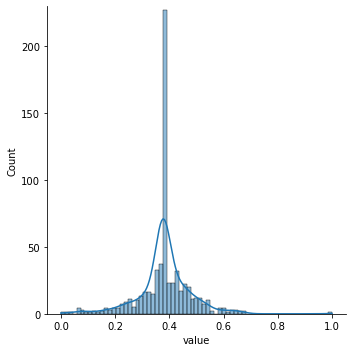

In [25]:
ylim = (0, 230)
sns.displot(df['value'],kde=True)
plt.ylim(ylim)
plt.figsize = (150, 8)
plt.show()

In [26]:
df.describe()

,value
count,642.000000
mean,0.382136
std,0.096568
min,0.000000
25%,0.359799
50%,0.377713
75%,0.422342
max,1.000000


In [27]:
print("Highest Allowed ",df['value'].mean()+3*df['value'].std())
print("Lowest Allowed ",df['value'].mean()-3*df['value'].std())

Highest Allowed  0.6718406889701469
Lowest Allowed  0.09243077481418577


In [28]:
df_out_z=df[(df['value']<0.09243077481418577) | (df['value']>0.6718406889701469)]

In [29]:
df_out_z

,Date,value
258,2021-12-13,0.674423
300,2022-01-24,0.031322
321,2022-02-14,0.000000
331,2022-02-24,0.016514
443,2022-06-16,0.065033
447,2022-06-20,0.081752
535,2022-09-16,0.071721
538,2022-09-19,0.085574
545,2022-09-26,0.068002
591,2022-11-11,1.000000


# IQR and Boxplot (Best for this project to me)

if data is skewed

irq= Interquattile range(50% distribution)
so outlier are
##### <[min=25percentile -1.5*IQR]
##### >[max75percentile +1.5*IQR]

In [30]:
df['value'].skew()

-0.018292036226028218

data is rightskewed

In [31]:
df['value'].describe()

count    642.000000
mean       0.382136
std        0.096568
min        0.000000
25%        0.359799
50%        0.377713
75%        0.422342
max        1.000000
Name: value, dtype: float64

In [32]:
p25=df['value'].quantile(0.25)
p75=df['value'].quantile(0.75)

print("25 percentile= ",p25)
print("75 percentile= ",p75)

25 percentile=  0.359799267288072
75 percentile=  0.42234201295711954


In [33]:
iqr=p75-p25
iqr

0.06254274566904755

In [34]:
print("Highest Allowed ",p75+1.5*iqr)
print("Lowest Allowed ",p25-1.5*iqr)

Highest Allowed  0.5161561314606908
Lowest Allowed  0.26598514878450064


In [36]:
df_out_i=df[(df['value']<0.26598514878450064) | (df['value']>0.5161561314606908)]

In [37]:
df_out_i

,Date,value
2,2021-04-01,0.517129
13,2021-04-12,0.188617
21,2021-04-20,0.525522
34,2021-05-03,0.656954
35,2021-05-04,0.249625
...,...,...
625,2022-12-15,0.220691
630,2022-12-20,0.257404
631,2022-12-21,0.113894
633,2022-12-23,0.086666


# Percentiles (Not My recommendation)
any data

##### we can't do this method because we can't decide the threshoid value as it is totally experimental

we have to calculate `threshold` 
######  Threshold:
the percentile range where the normal data without outliers live

In [38]:
df['value'].describe()

count    642.000000
mean       0.382136
std        0.096568
min        0.000000
25%        0.359799
50%        0.377713
75%        0.422342
max        1.000000
Name: value, dtype: float64

In [39]:
# let us consider 2% is the limit

print("Highest Allowed ",df['value'].quantile(0.98)) #(100-2/100)
print("Lowest Allowed ",df['value'].quantile(0.02))  #(2/100)

Highest Allowed  0.6048969239468778
Lowest Allowed  0.12818059891800612


In [40]:
df_out_p=df[(df['value']<0.12818059891800612) | (df['value']>0.6048969239468778)]

In [41]:
df_out_p

,Date,value
34,2021-05-03,0.656954
170,2021-09-16,0.605568
171,2021-09-17,0.666985
231,2021-11-16,0.615463
237,2021-11-22,0.095674
258,2021-12-13,0.674423
280,2022-01-04,0.647536
300,2022-01-24,0.031322
321,2022-02-14,0.000000
331,2022-02-24,0.016514


To remove this outier we will do
###  Capping
ie,
`if(data>max) data=max`
`if(data<min) data=min`